# Adding model observables by pattern

This notebook shows how we can construct model observables using patterns of concepts to include in an observable.

In [1]:
from mira.metamodel import *
from mira.modeling import Model
from mira.modeling.viz import GraphicalModel

We start with a standard SIR model using standard identifiers for the three compartments.

In [2]:
infected = Concept(name='infected population', identifiers={'ido': '0000511'})
susceptible = Concept(name='susceptible population', identifiers={'ido': '0000514'})
immune = Concept(name='immune population', identifiers={'ido': '0000592'})

t1 = ControlledConversion(
    controller=infected,
    subject=susceptible,
    outcome=infected,
)
t2 = NaturalConversion(subject=infected, outcome=immune)
template_model = TemplateModel(templates=[t1, t2])

We now stratify the model into two cities.

In [3]:
model_2_city = stratify(
    template_model,
    key="city",
    strata=[
        "geonames:5128581",  # NYC
        "geonames:4930956",  # Boston
    ],
)

#GraphicalModel.for_jupyter(model_2_city)

First, let's create an observable for all infected people. Note that an alternative to achieving this would have been to add an infected observable before stratification. The stratification would then correctly rewrite the observable expression to reflect changes upon stratification.

In [4]:
add_observable_pattern(model_2_city,
                       'infected',
                       identifiers={'ido': '0000511'})

In [5]:
print(model_2_city.observables['infected'].expression.args[0])

infected population_geonames_4930956 + infected population_geonames_5128581


We can also refer to a pattern just based on context to identify compartments to constructn an obserable. For instance, we can add an observable for all people in Boston irrespective of disease state, as follows.

In [6]:
add_observable_pattern(model_2_city,
                       'Boston',
                       context={'city': 'geonames:4930956'})

In [7]:
print(model_2_city.observables['Boston'].expression.args[0])

immune population_geonames_4930956 + infected population_geonames_4930956 + susceptible population_geonames_4930956


Let's now also stratify by age

In [8]:
model_2_city_age = stratify(
    model_2_city,
    key="age",
    strata=[
        "young",
        "old"
    ],
    structure=[],
    cartesian_control=True
)

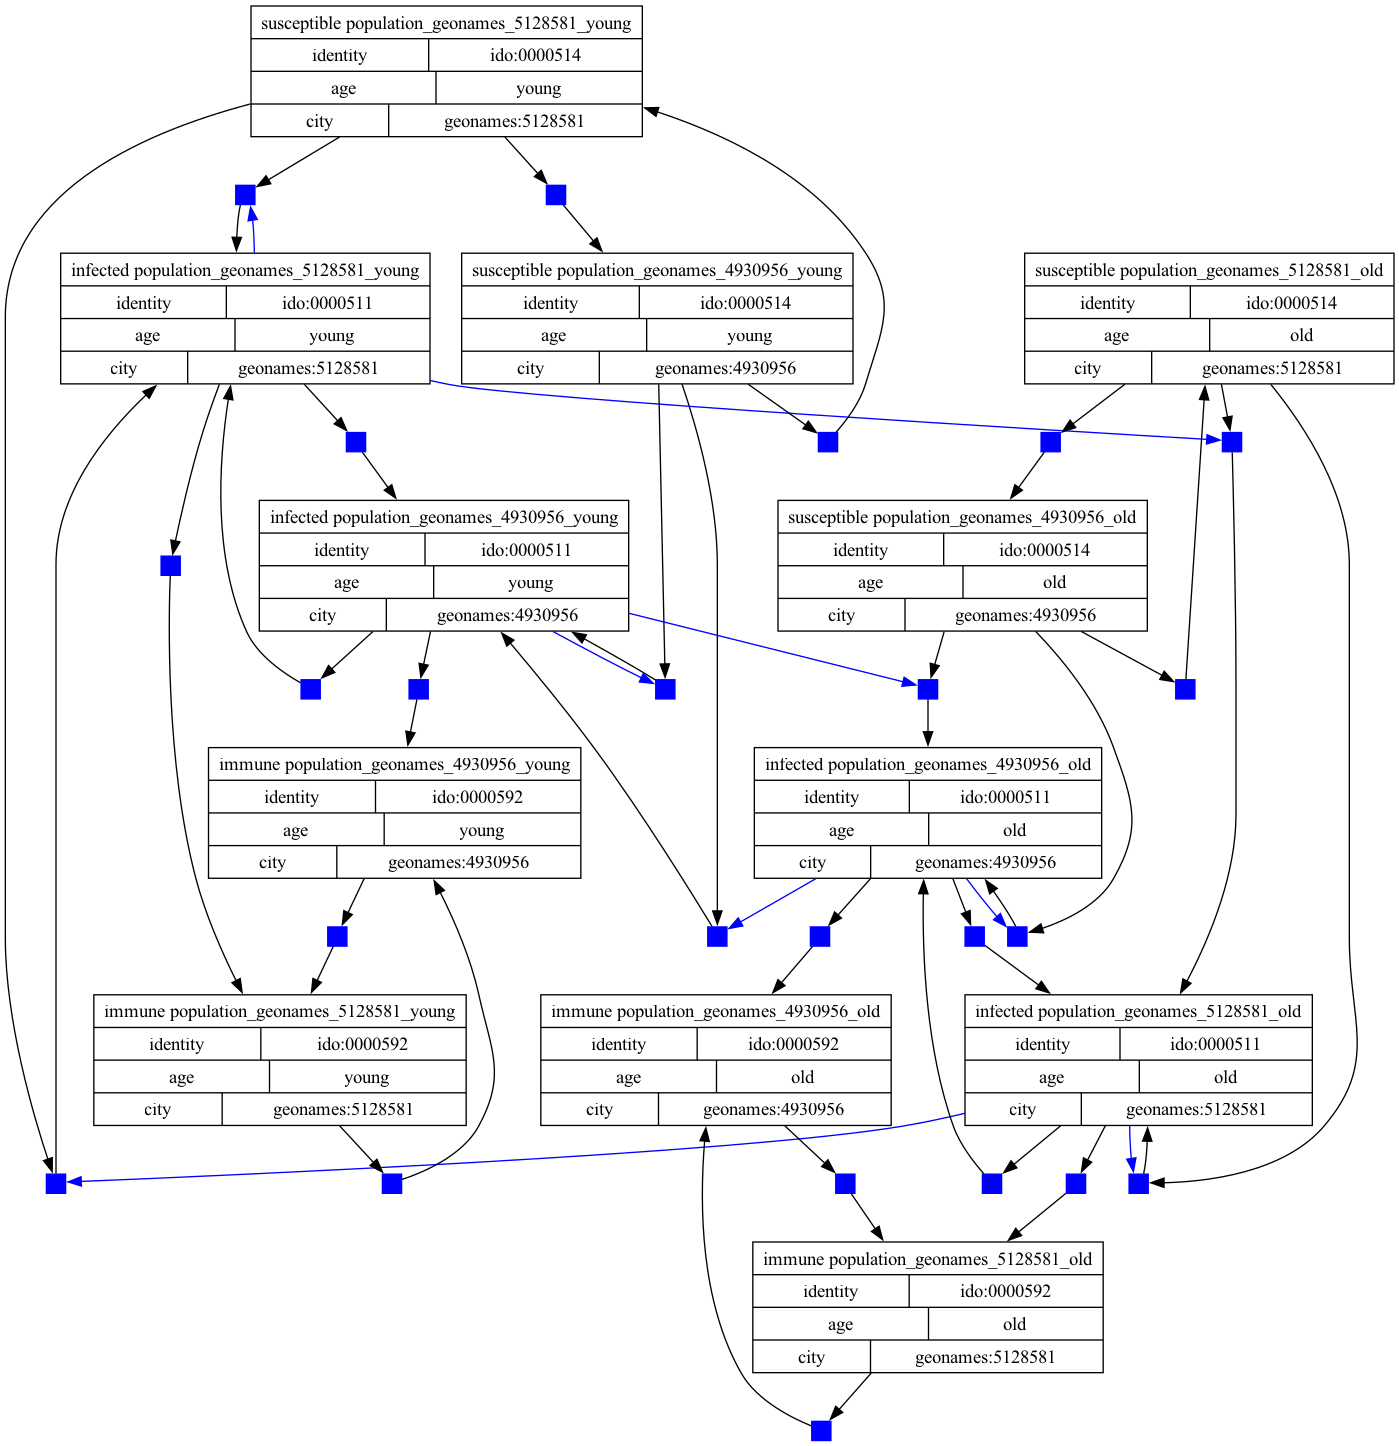

In [9]:
GraphicalModel.for_jupyter(model_2_city_age)

In [10]:
print(model_2_city_age.observables['infected'].expression.args[0])

infected population_geonames_4930956_old + infected population_geonames_4930956_young + infected population_geonames_5128581_old + infected population_geonames_5128581_young


In [11]:
print(model_2_city_age.observables['Boston'].expression.args[0])

immune population_geonames_4930956_old + immune population_geonames_4930956_young + infected population_geonames_4930956_old + infected population_geonames_4930956_young + susceptible population_geonames_4930956_old + susceptible population_geonames_4930956_young


We now add a number of other observables by pattern

In [12]:
add_observable_pattern(model_2_city_age,
                       'young',
                       context={'age': 'young'})

In [13]:
print(model_2_city_age.observables['young'].expression.args[0])

immune population_geonames_4930956_young + immune population_geonames_5128581_young + infected population_geonames_4930956_young + infected population_geonames_5128581_young + susceptible population_geonames_4930956_young + susceptible population_geonames_5128581_young


In [14]:
add_observable_pattern(model_2_city_age,
                       'young_Boston',
                       context={'age': 'young', 'city': 'geonames:4930956'})

In [15]:
print(model_2_city_age.observables['young_Boston'].expression.args[0])

immune population_geonames_4930956_young + infected population_geonames_4930956_young + susceptible population_geonames_4930956_young


In [16]:
add_observable_pattern(model_2_city_age,
                       'total_pop')

In [17]:
print(model_2_city_age.observables['total_pop'].expression.args[0])

immune population_geonames_4930956_old + immune population_geonames_4930956_young + immune population_geonames_5128581_old + immune population_geonames_5128581_young + infected population_geonames_4930956_old + infected population_geonames_4930956_young + infected population_geonames_5128581_old + infected population_geonames_5128581_young + susceptible population_geonames_4930956_old + susceptible population_geonames_4930956_young + susceptible population_geonames_5128581_old + susceptible population_geonames_5128581_young


In [18]:
add_observable_pattern(model_2_city_age,
                       'young_Boston_sus',
                       identifiers={'ido': '0000514'},
                       context={'age': 'young', 'city': 'geonames:4930956'})

In [19]:
print(model_2_city_age.observables['young_Boston_sus'].expression.args[0])

susceptible population_geonames_4930956_young
